# Task 1 : Implement a linear regression model to predict the prices of houses based on their sqaure footage and the number of bedrooms and bathrooms .

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Load the dataset
data = pd.read_csv("train.csv")

In [4]:
# Display the dataset
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# Display the shape of the dataset
data.shape

(1460, 81)

In [6]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Display descriptive statistics
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0.5, 1.0, 'Sale Price vs. GrLivArea')

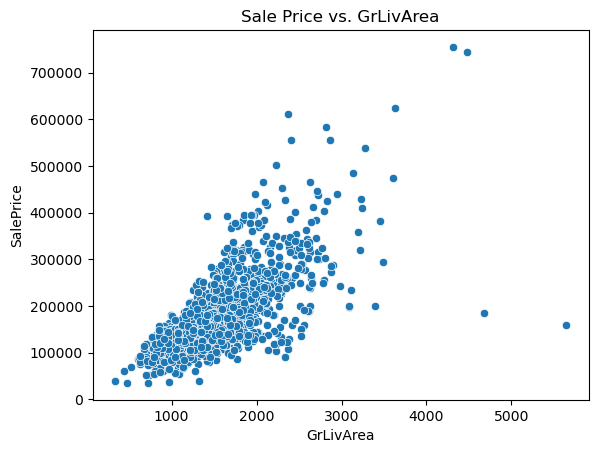

In [8]:
# Visualize relationships
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('Sale Price vs. GrLivArea')

Text(0.5, 1.0, 'Sale Price vs. BedroomAbvGr')

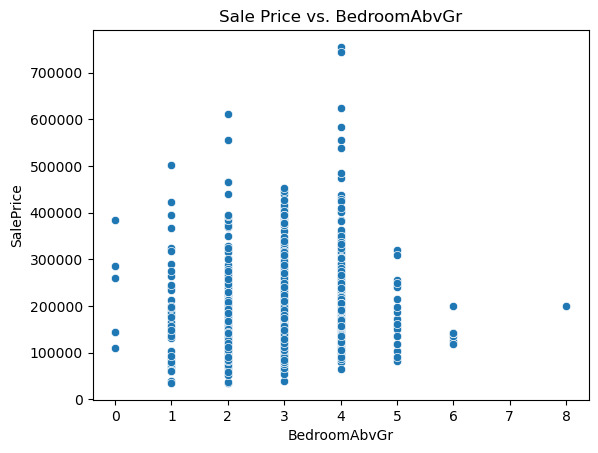

In [9]:
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=data)
plt.title('Sale Price vs. BedroomAbvGr')

Text(0.5, 1.0, 'Sale Price vs. FullBath')

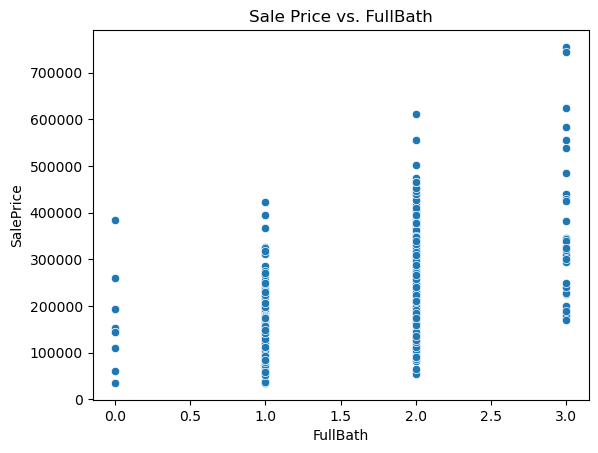

In [10]:
sns.scatterplot(x='FullBath', y='SalePrice', data=data)
plt.title('Sale Price vs. FullBath')

Text(0.5, 1.0, 'Sale Price vs. HalfBath')

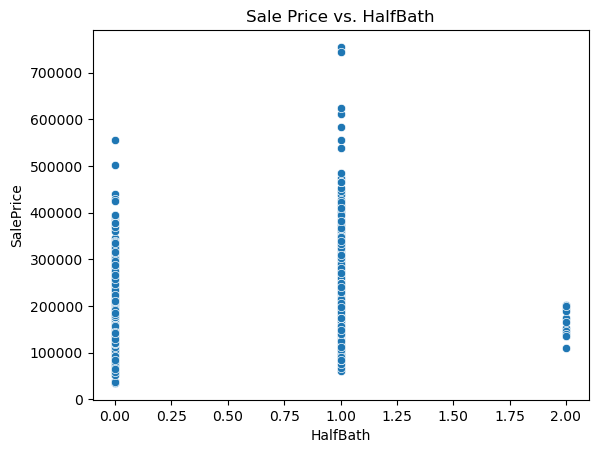

In [11]:
sns.scatterplot(x='HalfBath', y='SalePrice', data=data)
plt.title('Sale Price vs. HalfBath')

In [12]:
# Select features and target variable
x = data[['GrLivArea', 'BedroomAbvGr', 'FullBath','HalfBath']]
y = data['SalePrice']

In [13]:
x

,GrLivArea,BedroomAbvGr,FullBath,HalfBath
0,1710,3,2,1
1,1262,3,2,0
2,1786,3,2,1
3,1717,3,1,0
4,2198,4,2,1
...,...,...,...,...
1455,1647,3,2,1
1456,2073,3,2,0
1457,2340,4,2,0
1458,1078,2,1,0


In [15]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [14]:
# Check for missing values
x.isna().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
dtype: int64

In [16]:
y.isna().sum()

0

In [17]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train

,GrLivArea,BedroomAbvGr,FullBath,HalfBath
254,1314,3,1,0
1066,1571,3,2,1
638,796,2,1,0
799,1768,3,1,1
380,1691,3,2,0
...,...,...,...,...
1095,1314,3,2,0
1130,1981,4,2,0
1294,864,2,1,0
860,1426,3,1,1


In [19]:
x_test

,GrLivArea,BedroomAbvGr,FullBath,HalfBath
892,1068,3,1,0
1105,2622,3,2,1
413,1028,2,1,0
522,1664,3,2,0
1036,1620,2,2,0
...,...,...,...,...
479,1131,2,1,0
1361,1530,3,2,0
802,1456,3,2,1
651,1510,4,1,0


In [20]:
# Train Linear Regression model
model = LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
# Predict with Linear Regression model
pred = model.predict(x_test)

In [23]:
pred

array([112217.01764971, 305769.10684585, 134851.72968815, 203697.6554177 ,
       225925.43719242, 121066.18312231, 206963.72433062, 187148.93496707,
       121066.18312231, 149891.75484177, 184673.66558809,  92480.89985855,
       121219.56585303, 190574.15441225, 210954.35539557, 132817.07836948,
       214006.33237358, 145635.38167713, 133224.00863321, 184877.13071995,
       217838.4820825 , 200781.09880219, 189183.58628574, 125492.33362225,
       179993.96755513, 183096.02693429, 170736.30405516, 118167.58887501,
       202205.35472527, 198661.10952216, 130935.80978152, 247171.148868  ,
       379209.392647  , 127120.05467719, 200849.14357156, 119134.8321332 ,
       201877.09603393, 208462.69141201, 241984.35576901, 119998.77506182,
       123204.13477055, 253682.03308776, 100212.57486952, 246764.21860426,
       104078.412375  , 205835.60706595, 123050.75203984, 100721.23769919,
       272604.29035144, 163218.7209791 , 104078.412375  , 220533.61119793,
       140837.55647367, 3

In [24]:
# Evaluate Linear Regression model
mse = mean_squared_error(y_test,pred)
print("The mean Squared error is :",mse)

The mean Squared error is : 2810942965.2180653


In [25]:
r2 = r2_score(y_test,pred)
print("The R2 score is : ",r2)

The R2 score is :  0.6335301929422245


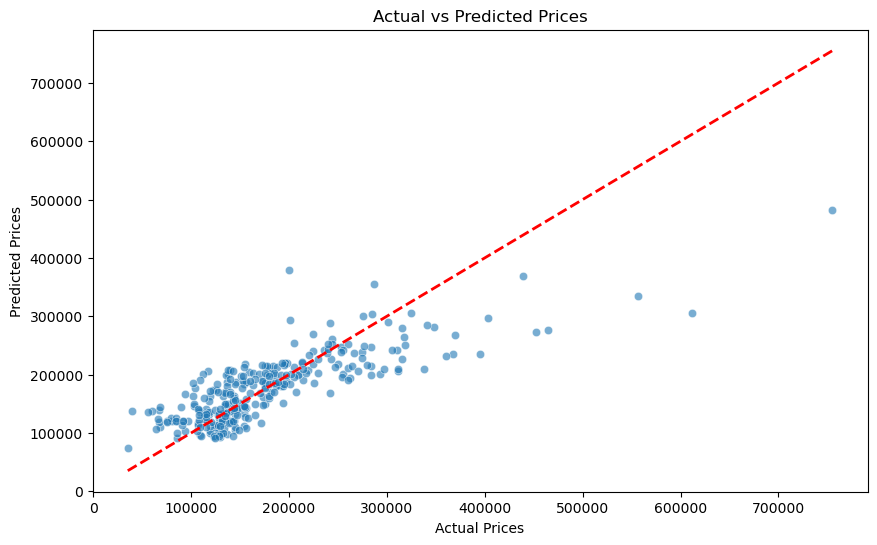

In [26]:
# Plot actual vs predicted prices for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test,pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Best fit line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [28]:
# Train RandomForestRegressor model
model2 = RandomForestRegressor()

In [29]:
model2.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
# Predict with RandomForestRegressor model
pred2 = model2.predict(x_test)

In [31]:
pred2

array([134841.        , 305792.61      ,  97283.83333333, 248754.        ,
       198610.        ,  82953.74603175, 205570.        , 167279.61217893,
        82953.74603175, 150165.78571429, 170812.        , 109040.48701282,
       118279.94285714, 206445.        , 209946.5       , 135365.        ,
       193677.5       , 131179.        , 131126.66666667, 182400.66666667,
       289666.13      , 188187.5       , 167405.        , 120454.03650794,
       197374.24666667, 179301.17333333, 167254.56      ,  98803.58979076,
       190377.        , 211993.66666667, 133408.83333333, 329907.5       ,
       333645.55      , 128180.5       , 228859.53333333, 144315.3       ,
       192692.        , 204618.03809524, 180606.        , 113414.45887446,
       140817.5       , 247175.88      , 111700.58333333, 325887.5       ,
       119881.40595238, 199655.46      , 126656.54297092, 116603.33333333,
       260854.66666667, 164230.60666667, 119881.40595238, 245590.54      ,
       152350.        , 3

In [32]:
# Evaluate RandomForestRegressor model
mse = mean_squared_error(y_test,pred2)
print("The mean Squared error is :",mse)

The mean Squared error is : 1942800942.3370845


In [33]:
r2 = r2_score(y_test,pred2)
print("The R2 score is : ",r2)

The R2 score is :  0.7467120837029496


In [37]:
# Cross-validation for Random forest Regression model
cv_scores = cross_val_score(model2, x, y, cv=5)
print("Cross-validation R2 scores:", cv_scores)
print("Mean cross-validation R2 score:", np.mean(cv_scores))

Cross-validation R2 scores: [0.58788001 0.54635203 0.63147433 0.65857215 0.63677018]
Mean cross-validation R2 score: 0.6122097400120984


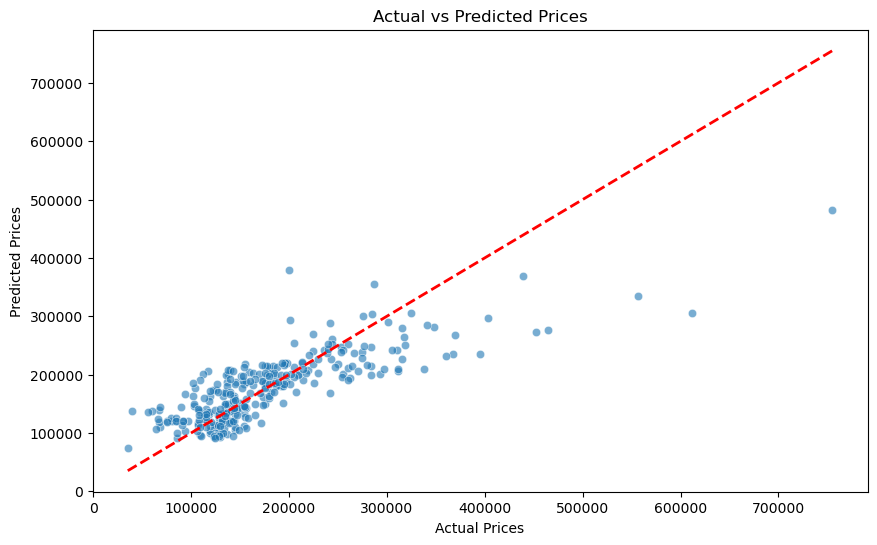

In [36]:
# Plot actual vs predicted prices for RandomForestRegressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Best fit line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# The End